In [46]:
#-*- coding:utf-8 -*-
import qrcode
import time
from PIL import Image
import matplotlib.pyplot as plt

In [47]:
text1="""2021信通岗位新进员工技能强化班\n\r原定6月举办\n"""
print(text1)

2021信通岗位新进员工技能强化班
原定6月举办



In [62]:
def qr_code(name,origin_date,real_date):
    # 实例化QRCode生成qr对象
    '''
    参数 version 表示生成二维码的尺寸大小，取值范围是 1 至 40，最小尺寸 1 会生成 21 * 21 的二维码矩阵，
    version 每增加 1，生成的二维码就会添加 4 个单位大小，例如 version 是 2，则生成 25 * 25 尺寸大小的二维码。

    参数 error_correction 指定二维码的容错系数，分别有以下4个系数：
    ERROR_CORRECT_L: 7%的字码可被容错
    ERROR_CORRECT_M: 15%的字码可被容错
    ERROR_CORRECT_Q: 25%的字码可被容错
    ERROR_CORRECT_H: 30%的字码可被容错

    参数 box_size 表示二维码里每个格子的像素大小。
    参数 border 表示边框的格子宽度是多少（默认是4）
    '''
    qr = qrcode.QRCode(
        version=2,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=10,
        border=1
    )
   
    
            #延期至7月"""
#     qr.add_data('2021信通岗位新进员工技能强化班,原定6月,延期至7月')# 添加数据
    month1=int(origin_date[4:6])
    if real_date is None:
        color='red'
    else:
        month2=int(real_date[4:6])
        if month1==month2:
            color='green'
        else:
            color='yellow'

    if color=='green':
        qr.add_data('%s%d举办'%(name,month1))
    elif color=='yellow':
        qr.add_data('%s,原定%d月,延期至%d月'%(name,month1,month2))# 添加数据
    elif color=='red':
        qr.add_data('%s取消'%name)# 添加数据
    #qr.add_data('{:<10d}'.format('2021信通岗位新进员工技能强化班\n\r'))
    #qr.add_data(text1)
    #qr.add_data(text2)
    qr.make(fit=True)# 填充数据
    
   # 生成图片
    img = qr.make_image(fill_color=color, back_color="white")
    img = img.convert("RGBA")
    # 添加logo，打开logo照片
    icon = Image.open(r"jupyter_lab/二维码/国网.jpg").convert("RGBA")
     # 获取图片的宽和搞
    img_w, img_h = img.size
    # 参数设置logo的大小
    factor = 3
    size_w = int(img_w / factor)
    size_h = int(img_h / factor)
    icon_w, icon_h = icon.size
    if icon_w > size_w:
        icon_w = size_w
    if icon_h > size_h:
        icon_h = size_h
    # 重新设置logo的尺寸
    icon = icon.resize((icon_w, icon_h), Image.ANTIALIAS)
    # 得到画图的x，y坐标，居中显示
    w = int((img_w - icon_w) / 2)
    h = int((img_h - icon_h) / 2)
    '''
    img.paste(path,where,mask=None)
    其中，img为image对象；path为所添加图片；where为tuple,如：(x,y)，表示图片所在二维码的横纵坐标
    '''
    # 黏贴logo照
    img.paste(icon, (w, h), icon)
    
    # img.show()# 自动打开图片
    # 终端显示图片
    img.save(r"jupyter_lab/二维码/培训绿码.png")
    plt.imshow(img)
    plt.show()

In [77]:
def read_date():
    f=open("jupyter_lab/二维码/data.csv")
    lines=f.readlines()
    target=[]
    for line in lines:
        strs=line.strip().split(',')
        record=dict()
        record['name']=strs[0]
        record['origin_date']=strs[1]
        if len(strs)==3:
            record['real_date']=strs[2]
        else:
            record['real_date']=None
        target.append(record)
    return target

{'name': '国网培训1', 'origin_date': '20210516', 'real_date': '20210617'}


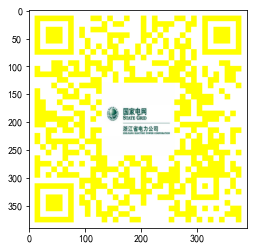

{'name': '国网培训2', 'origin_date': '20210616', 'real_date': '20210617'}


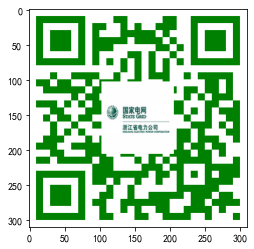

{'name': '国网培训3', 'origin_date': '20210716', 'real_date': None}


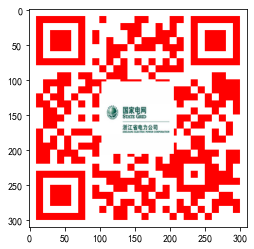

{'name': '国网培训4', 'origin_date': '20210516', 'real_date': '20210617'}


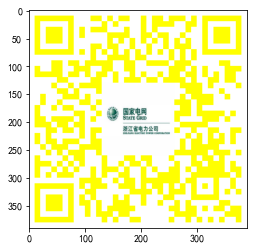

In [78]:
if __name__ == '__main__':
    
    name='2021信通岗位新进员工技能强化班'
    origin_date='20210606'
    real_date=None
    records=read_date()
#         qr_code(record['name',origin_date,real_date)
    for record in records:
        print(record)
        qr_code(record['name'],record['origin_date'],record['real_date'])
    #origin_date==real_date,green
    #origin_date<real_date,yellow
    #real_date is None
    #20210521
